In [1]:
#加载模块
%matplotlib inline  
#Jupyter画图需要设置成inline模式

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#下载数据集
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
#查看数据形状
print('training data shape:',x_train.shape)
print('training labels shape:',x_train.shape)
print('test data shape:',x_test.shape)
print('test labels shape',y_test.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 32, 32, 3)
test data shape: (10000, 32, 32, 3)
test labels shape (10000, 1)


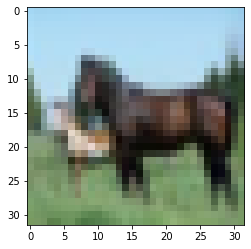

In [8]:
#查看单张图片
plt.imshow(x_train[12])

In [9]:
#查看对应的标签值
y_train[12]

array([7], dtype=uint8)

In [10]:
#定义标签字典 每一个数字代表图像类别的名称
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [11]:
#利用key-value查看标签示例
label_dict[y_train[6][0]]

'bird'

In [12]:
#特征数据标准化
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [13]:
#对图像images进行min-max标准化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [14]:
#建立卷积神经网络CNN模型
#建立Sequential线性堆叠模型
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           input_shape=(32,32,3),
                           activation='relu',
                           padding='same'),         #第1个卷积层
    tf.keras.layers.Dropout(rate=0.3),              #防止过拟合
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),   #第1个池化层
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           input_shape=(32,32,3),
                           activation='relu',
                           padding='same'),          #第2个卷积层        
    tf.keras.layers.Dropout(rate=0.3),               #防止过拟合
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),   #第2个池化层
    tf.keras.layers.Flatten(),                       #平坦层
    tf.keras.layers.Dense(10,activation='softmax')   #输出层                                              
])

In [15]:
#打印网络结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [16]:
#设置训练参数
train_epochs=5     #训练轮数
batch_size=100     #单次训练样本数（批次大小）

In [17]:
#定义训练模式
model.compile(optimizer='SGD',  #优化器
              loss='sparse_categorical_crossentropy',  #损失函数
              metrics=['accuracy'])    #评估模型的方式

In [18]:
#训练模型
train_history=model.fit(x_train,y_train,
                        validation_split=0.2,
                        epochs=train_epochs,
                        batch_size=batch_size,
                        verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 - 30s - loss: 1.5562 - accuracy: 0.4458 - val_loss: 1.4293 - val_accuracy: 0.5350
Epoch 2/5
40000/40000 - 30s - loss: 1.2185 - accuracy: 0.5732 - val_loss: 1.2868 - val_accuracy: 0.6058
Epoch 3/5
40000/40000 - 29s - loss: 1.0875 - accuracy: 0.6244 - val_loss: 1.1781 - val_accuracy: 0.6338
Epoch 4/5
40000/40000 - 29s - loss: 1.0009 - accuracy: 0.6524 - val_loss: 1.1091 - val_accuracy: 0.6589
Epoch 5/5
40000/40000 - 29s - loss: 0.9451 - accuracy: 0.6716 - val_loss: 1.0587 - val_accuracy: 0.6724


In [19]:
#定义训练过程可视化函数
def visu_train_history(train_history,train_metric,validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

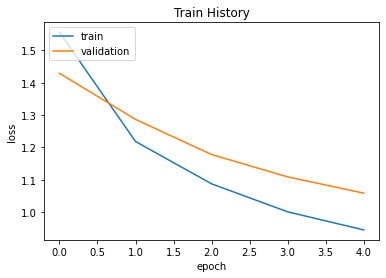

In [20]:
#可视化损失
visu_train_history(train_history,'loss','val_loss')

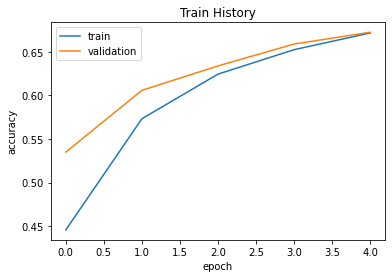

In [21]:
#可视化准确率
visu_train_history(train_history,'accuracy','val_accuracy')

In [22]:
#评估模型
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print('Test accuracy:',test_acc)

10000/1 - 1s - loss: 1.1054 - accuracy: 0.6710
Test accuracy: 0.671


In [23]:
#应用进行预测
preds=model.predict_classes(x_test)
preds

array([3, 8, 1, ..., 5, 4, 7], dtype=int64)

In [25]:
#定义显示图像数据及其对应标签的函数
def plot_images_labels_predicitin(images,   #图像列表
                                  labels,   #标签列表
                                  preds,    #预测值列表
                                  index,    #从第index个开始显示
                                  num=5):   #缺省一次显示5幅
    fig=plt.gcf()   #获取当前图表
    fig.set_size_inches(12,6)    #1英寸等于2.54cm
    if num>10:
        num=10      #最多显示10个子图
    for i in range(0,num):
        ax=plt.subplot(2,5,i+1)  #获取当前要处理的子图
        ax.imshow(images[index])
        title=str(i)+','+label_dict[labels[index][0]]   #构建改图上要显示的title信息
        if len(preds)>0:
            title+='=>'+label_dict[preds[index]]
            
        ax.set_title(title,fontsize=10)   #显示图上的title信息
        index+=1
    plt.show()

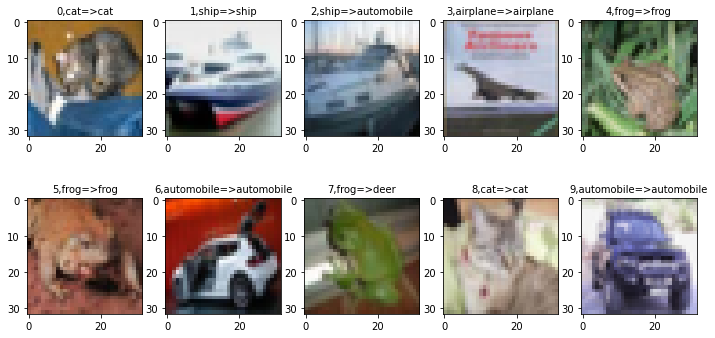

In [26]:
#可视化预测结果
plot_images_labels_predicitin(x_test,y_test,preds,0,10)

In [27]:
#通过回调函数保存模型
#设置回调函数

#可以是格式化的字符串，里面的占位符将会被epoch值和传入的监控指标所填入
checkpoint_path='./checkpoint_zhujiaoCNN/TSP.{epoch:02d}.ckpt'
callbacks=[
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       verbose=2,
                                       save_weights_only=True)
]

In [28]:
#增加了回调函数的模型训练
train_history=model.fit(x_train,y_train,
                        validation_split=0.2,
                        epochs=train_epochs,
                        batch_size=batch_size,
                        callbacks=callbacks,  #增加了回调参数
                        verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5

Epoch 00001: saving model to ./checkpoint_zhujiaoCNN/TSP.01.ckpt
40000/40000 - 30s - loss: 0.9012 - accuracy: 0.6902 - val_loss: 1.0387 - val_accuracy: 0.6713
Epoch 2/5

Epoch 00002: saving model to ./checkpoint_zhujiaoCNN/TSP.02.ckpt
40000/40000 - 34s - loss: 0.8628 - accuracy: 0.7026 - val_loss: 1.0060 - val_accuracy: 0.6879
Epoch 3/5

Epoch 00003: saving model to ./checkpoint_zhujiaoCNN/TSP.03.ckpt
40000/40000 - 32s - loss: 0.8338 - accuracy: 0.7119 - val_loss: 0.9645 - val_accuracy: 0.6971
Epoch 4/5

Epoch 00004: saving model to ./checkpoint_zhujiaoCNN/TSP.04.ckpt
40000/40000 - 31s - loss: 0.8032 - accuracy: 0.7216 - val_loss: 0.9597 - val_accuracy: 0.6993
Epoch 5/5

Epoch 00005: saving model to ./checkpoint_zhujiaoCNN/TSP.05.ckpt
40000/40000 - 32s - loss: 0.7721 - accuracy: 0.7319 - val_loss: 0.9344 - val_accuracy: 0.7017


In [29]:
#加载以前保存的模型
#加载模型

checkpoint_dir='./checkpoint/'   #检查点文件保存目录

#得到最新的检查点文件
model_filename=tf.train.latest_checkpoint(checkpoint_dir)

if model_filename!=None:
    model.load_weights(model_filname)
    print("加载模型权重文件{}成功！".format(model_filename))
else:
    print("没有找到模型权重文件，需要重头开始训练！")

没有找到模型权重文件，需要重头开始训练！
